In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!tar -xvf '/content/gdrive/My Drive/UTKFace.tar.gz' 

In [0]:
from fastai.vision import *
from fastai import *
from fastai.core import *
from pathlib import Path
import random
import os
import torch
import numpy as np

In [0]:
path = Path('/content/UTKFace/')

In [0]:
def age(filename):
  x=int(filename.stem.split('_')[0])
  if(x <=14):
    return 1
  if(x > 14 and x <= 25):
    return 2
  if(x > 25 and x < 40):
    return 3
  if(x >= 40 and x < 60):
    return 4
  if(x >= 60):
    return 5

In [0]:
age(path/'80_0_0_20170117202521375.jpg.chip.jpg')

5

In [0]:
np.random.seed(2)
f=get_transforms(do_flip=False,max_rotate=0.05,max_zoom=1, max_lighting=0, max_warp=0, p_affine=0, p_lighting=0 )
#get_transforms(max_warp=0.)

In [0]:
data= ImageList.from_folder(path).split_by_rand_pct(0.2, seed=666).label_from_func(age).transform(f,size=224).databunch(bs=256)

In [0]:
data

ImageDataBunch;

Train: LabelList (18967 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
4,3,5,3,4
Path: /content/UTKFace;

Valid: LabelList (4741 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,4,3,4,3
Path: /content/UTKFace;

Test: None

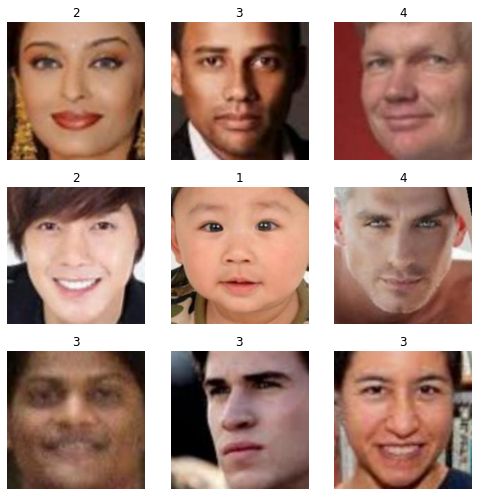

In [0]:
data.show_batch(rows=3, figsize=(7,7))

In [0]:
#data = ImageDataBunch.from_folder(path, size=200)
#data = ImageDataBunch.from_folder('/content/gdrive/My Drive/faces/UTKFace/', size=200)
#data = ImageDataBunch.from_folder(path='/content/', train='/content/UTKFace', valid_pct=0.2,size=200)

In [0]:
from fastai.metrics import error_rate 
from fastai.metrics import accuracy
learn = cnn_learner(data, models.resnet34, metrics=(error_rate,accuracy))

In [0]:
defaults.device = torch.device('cuda') 
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.715272,1.108019,0.445054,0.554946,01:34
1,1.183525,0.949435,0.408775,0.591226,01:36
2,0.969781,0.925674,0.395064,0.604936,01:36
3,0.870623,0.917532,0.395064,0.604936,01:37


In [0]:
learn.unfreeze() 
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


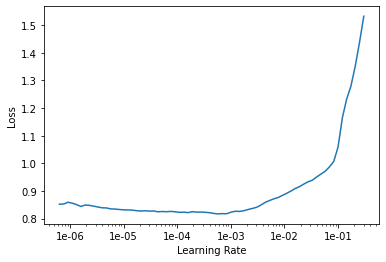

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6,max_lr =1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.803644,0.846177,0.359629,0.640371,01:41
1,0.725493,0.845216,0.361738,0.638262,01:43
2,0.637194,0.857016,0.371019,0.628981,01:42
3,0.533548,0.784569,0.317233,0.682767,01:42
4,0.341906,0.865964,0.294664,0.705336,01:42
5,0.159099,0.881178,0.281586,0.718414,01:42


In [0]:
learner.save('first')

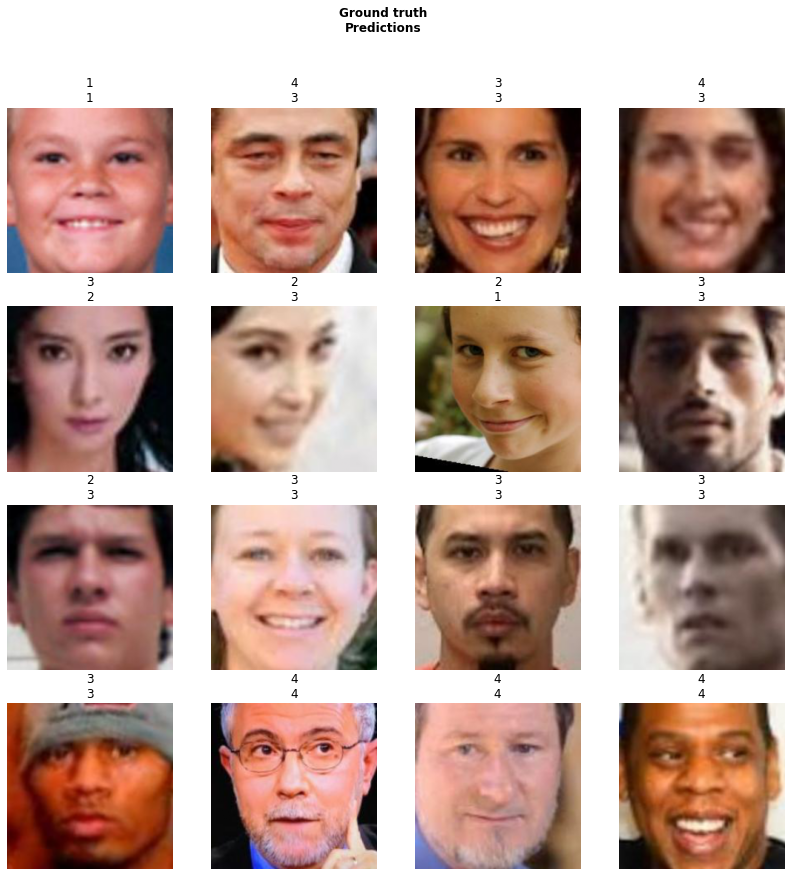

In [0]:
learn.show_results(rows=4,figsize=(14,14))

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

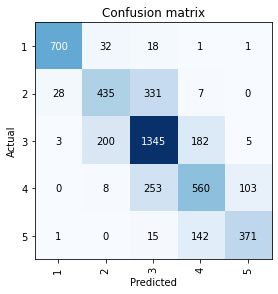

In [0]:
interp.plot_confusion_matrix()

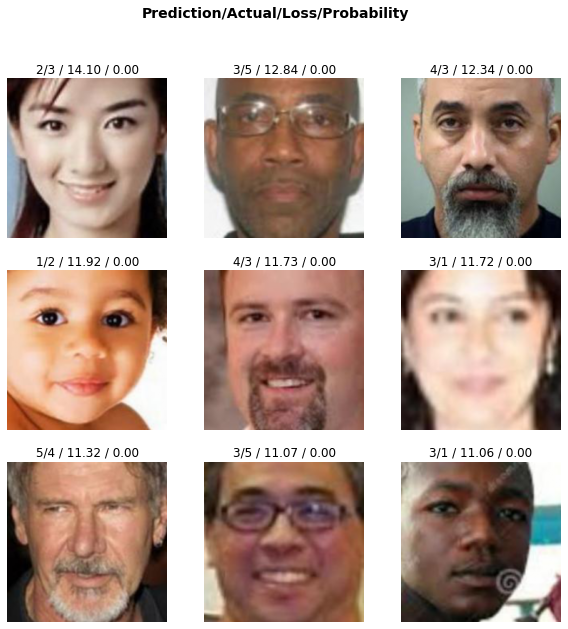

In [0]:
interp.plot_top_losses(9, figsize=(10,10))

In [0]:
img = learn.data.train_ds[77][0]
learn.predict(img)

(Category tensor(3),
 tensor(3),
 tensor([3.6066e-06, 1.4238e-06, 1.5249e-04, 9.9892e-01, 9.1779e-04]))